# Interaction value plots

In [1]:
from utils import get_explanations
import shap
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
explaination_path = '/home/lw754/masterproject/cross-modal-interaction/results/single-cell_all_epochs_200_concat_early/seed_1/'
modality_names = ['Protein', 'RNA'] #['M1', 'M2','M3','M4','M5'] #['Modality 1', 'Modality 2','Modality 3','Modality 4','Modality 5'] # ['Modality 1', 'Modality 2', 'Modality 3'] ['Mod 1', 'Mod 2','Mod 3','Mod 4']
n_classes = 4
explaination_path = Path(explaination_path)
results = get_explanations(explaination_path,modality_names,n_classes)

Results is a dict that contains shap.Explanation objects. There are various explanation objects, which are explained below:
    - Single Interaction Split: The shapley values and the shaply interaction values are stored in the explanation at sample base level. The interactions are split into the individual partial interactions and are not totalled.
    - Single Class: This is a single interaction split, but only for a single class
    - Single: The shapley values and the shaply interaction values are saved in the explanation at sample base level. The interactions are totalled.
    - Mean: Mean over all samples in Single


In [3]:
results.keys()

dict_keys(['Single Interaction Split', 'Mean Interaction Split', 'Single Class 3', 'Mean Class 3', 'Single Class 2', 'Mean Class 2', 'Single Class 0', 'Mean Class 0', 'Single Class 1', 'Mean Class 1', 'Mean', 'Single'])

## How to plot

If you want to plot the mean over the whole test dataset, use mean Explanation:

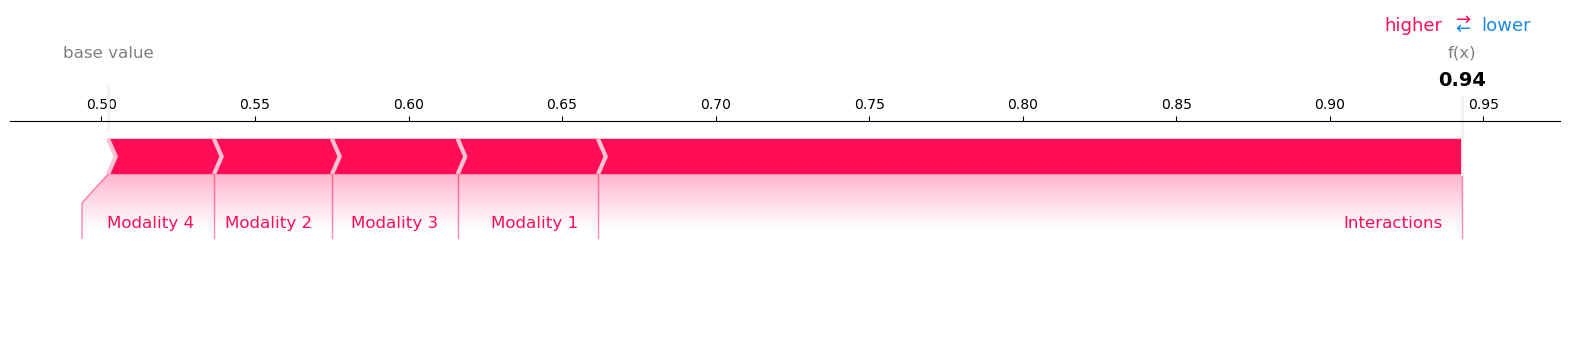

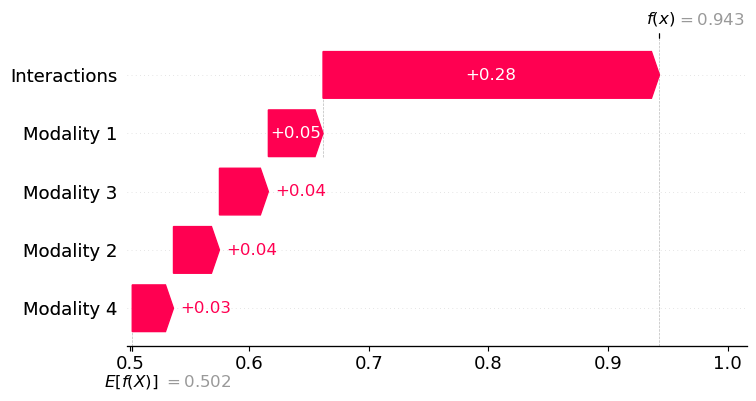

In [23]:
exp = results['Mean']
shap.force_plot(exp[0], show=True, matplotlib=True)
shap.plots.waterfall(exp[0],show=True)

And for single split: and sample 3

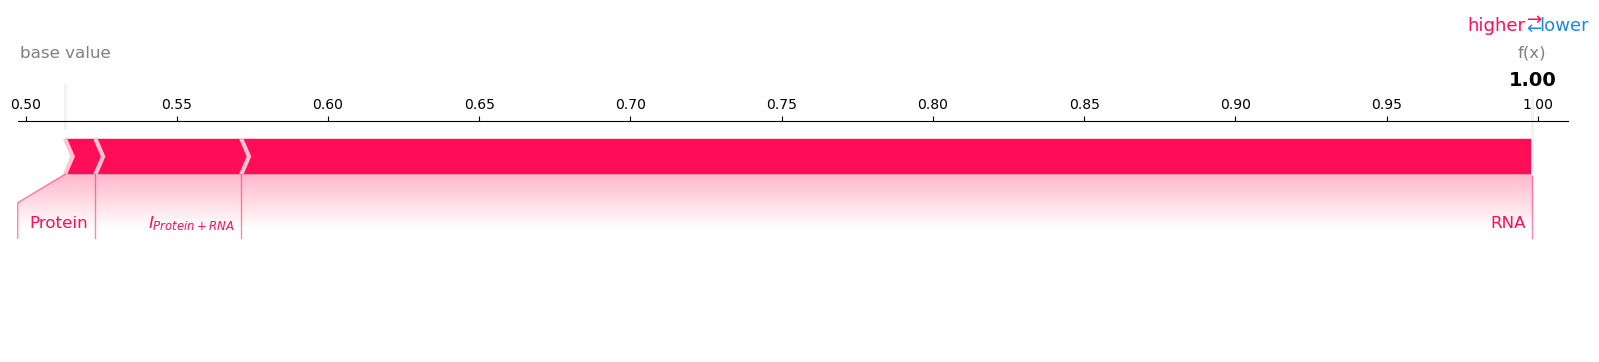

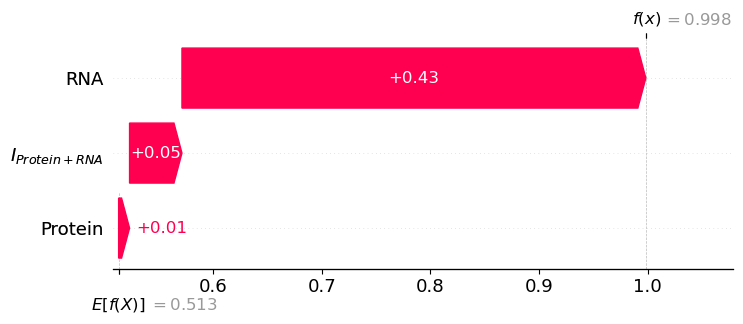

In [8]:
exp = results['Single Interaction Split']
shap.force_plot(exp[2], show=True, matplotlib=True)
shap.plots.waterfall(exp[2],show=True)

If you want to save the explanations as pdf:

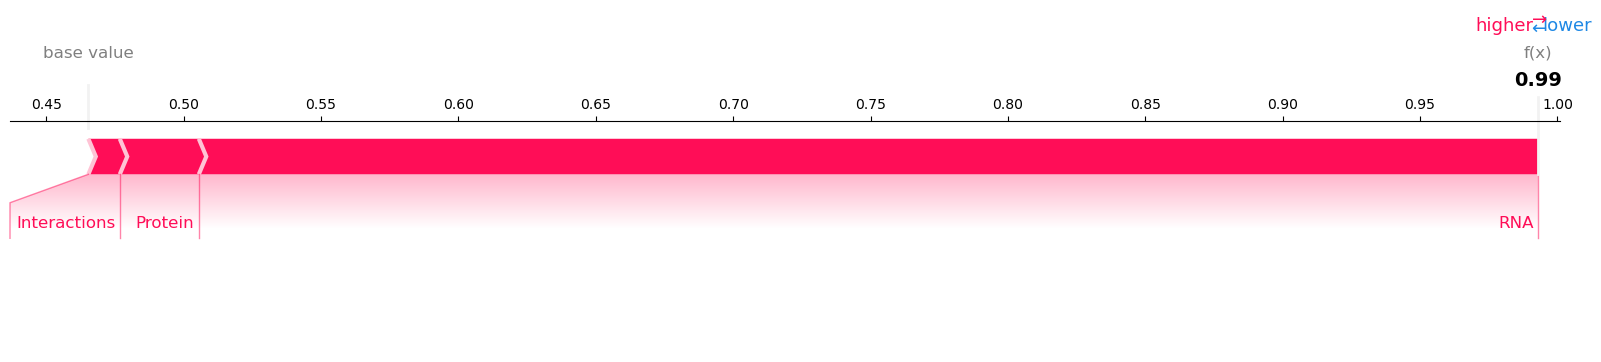

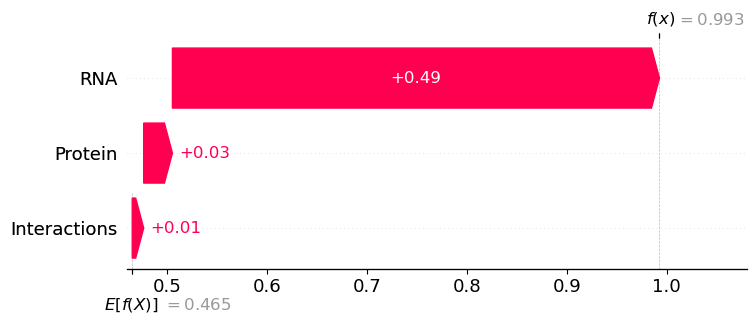

In [9]:
exp = results['Mean']
shap.force_plot(exp[0], show=False, matplotlib=True)
plt.savefig(explaination_path/f'mean_force_plot.pdf',bbox_inches='tight')
plt.show()

shap.plots.waterfall(exp[0],show=False)
plt.savefig(explaination_path/'mean_waterfall_plot.pdf',bbox_inches='tight')
plt.show()

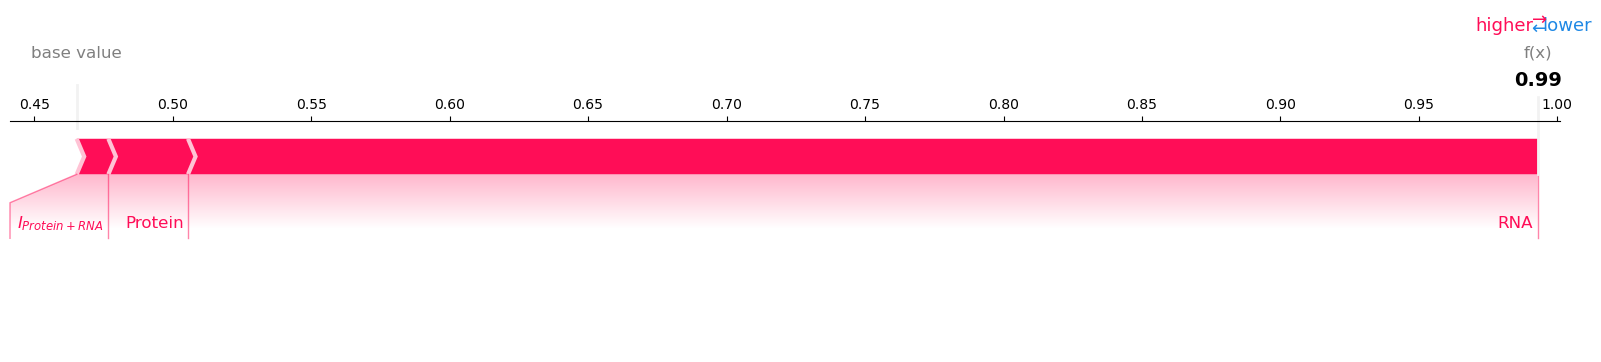

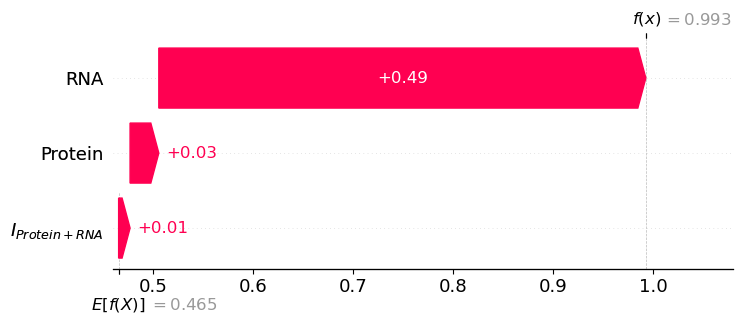

In [10]:
exp = results['Mean Interaction Split']
shap.force_plot(exp[0], show=False, matplotlib=True)
plt.savefig(explaination_path/f'mean_split_force_plot.pdf',bbox_inches='tight')
plt.show()

shap.plots.waterfall(exp[0],show=False)
plt.savefig(explaination_path/'mean_split_waterfall_plot.pdf',bbox_inches='tight')
plt.show()

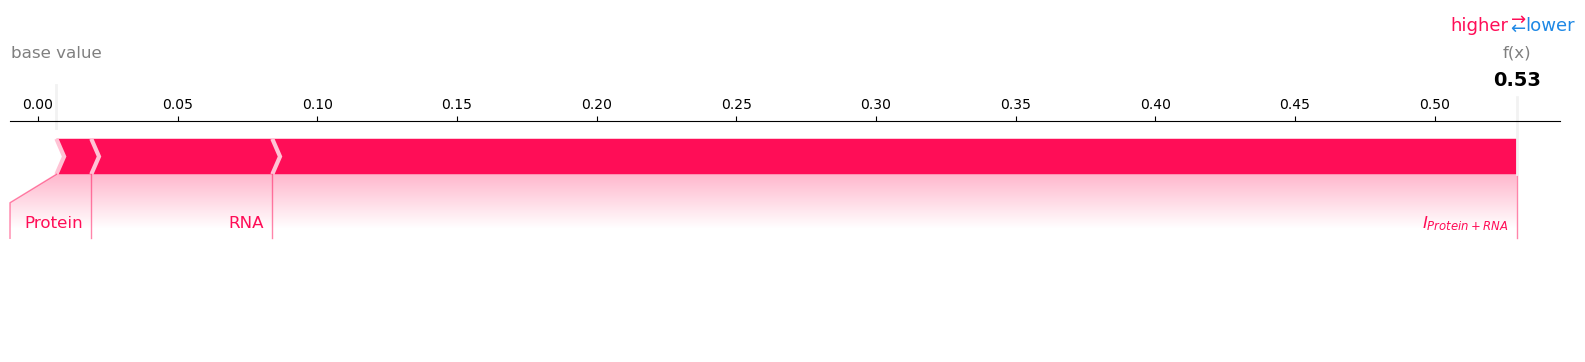

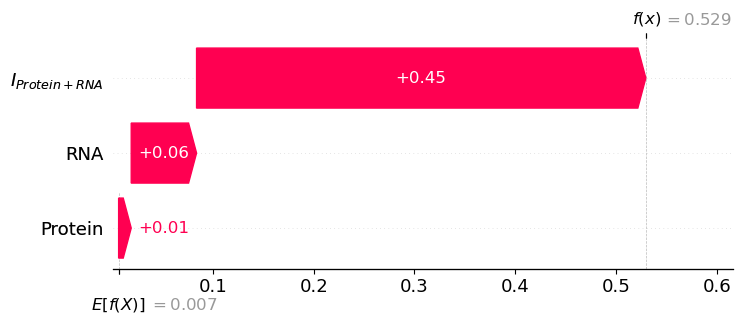

In [12]:
exp = results['Single Class 0']
number = 0

shap.force_plot(exp[number], show=False, matplotlib=True)
plt.savefig(explaination_path/f'single_class_0_num_{number}_force_plot.pdf',bbox_inches='tight')
plt.show()

shap.plots.waterfall(exp[number],show=False)
plt.savefig(explaination_path/f'single_class_0_num_{number}_waterfall_plot.pdf',bbox_inches='tight')
plt.show()

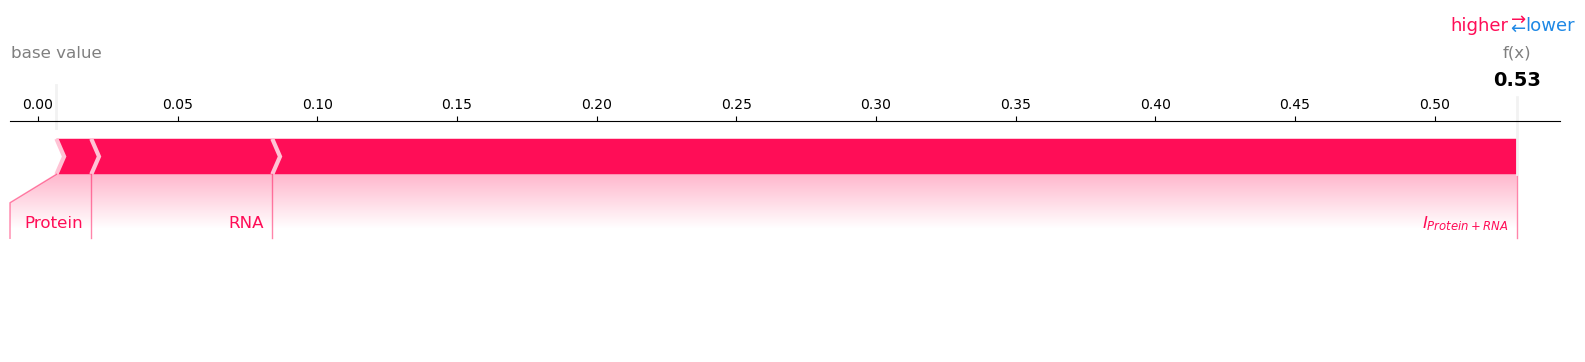

In [4]:
exp = results['Mean Class 0']
number = 0

shap.force_plot(exp[number], show=False, matplotlib=True)
plt.savefig(explaination_path/f'single_class_0_num_{number}_force_plot.pdf',bbox_inches='tight')
plt.show()

shap.plots.waterfall(exp[number],show=False)
plt.savefig(explaination_path/f'single_class_0_num_{number}_waterfall_plot.pdf',bbox_inches='tight')
plt.show()

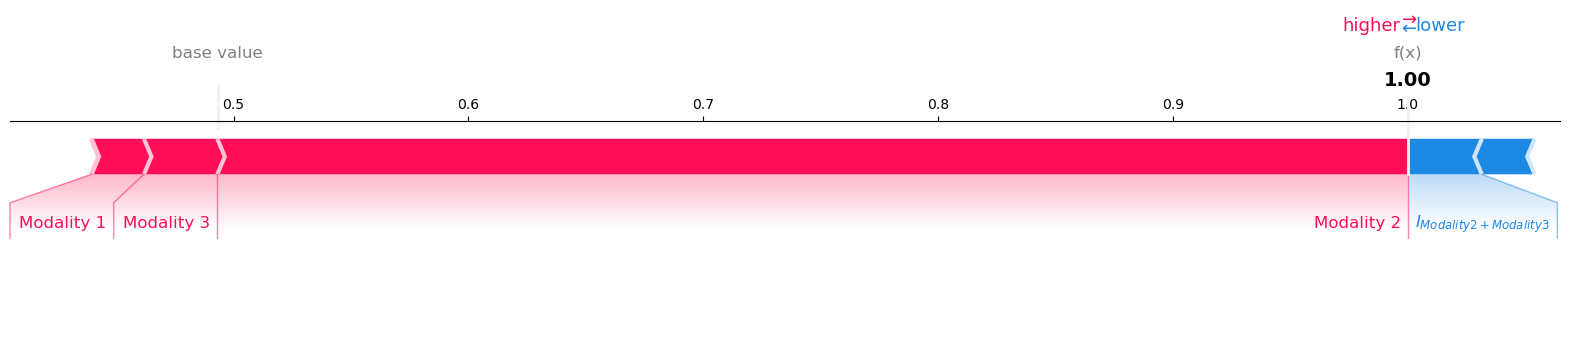

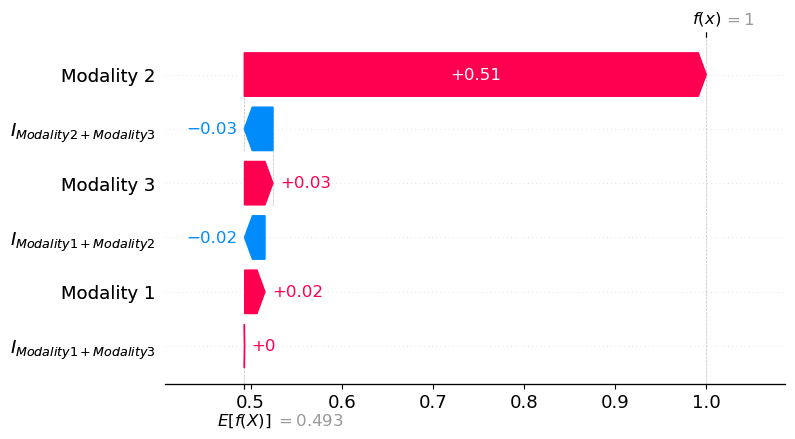

In [12]:
exp = results['Single Class 1']
number = 6

shap.force_plot(exp[number], show=False, matplotlib=True)
plt.savefig(explaination_path/f'single_class_1_num_{number}_force_plot.pdf',bbox_inches='tight')
plt.show()

shap.plots.waterfall(exp[number],show=False)
plt.savefig(explaination_path/f'single_class_1_num_{number}_waterfall_plot.pdf',bbox_inches='tight')
plt.show()

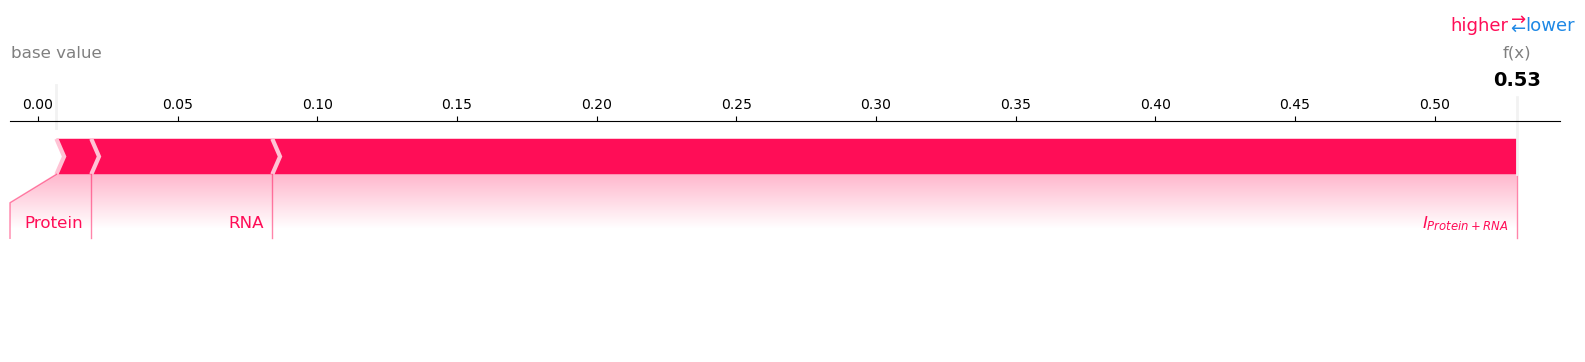

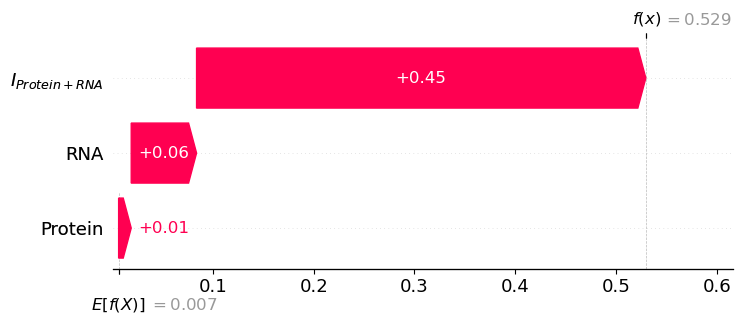

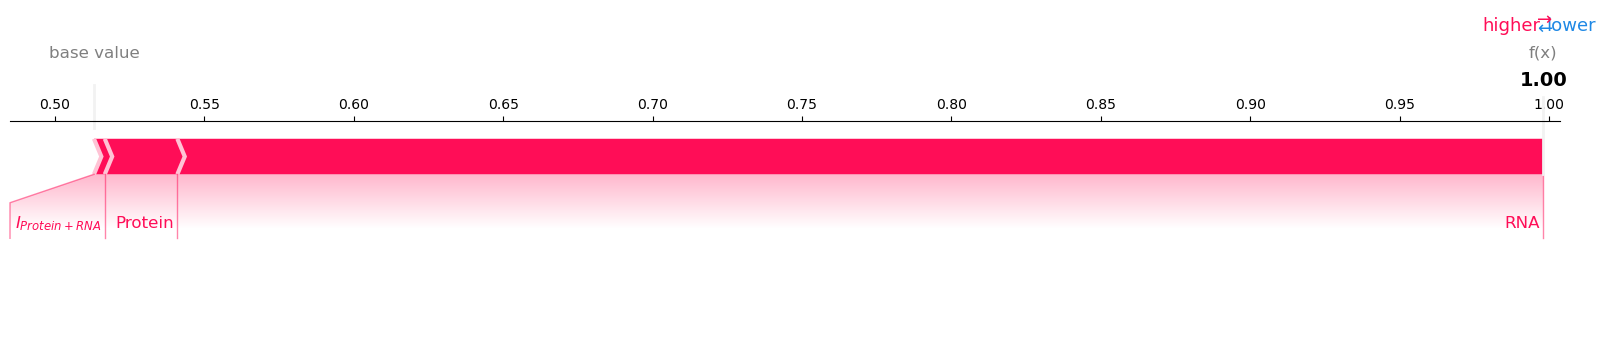

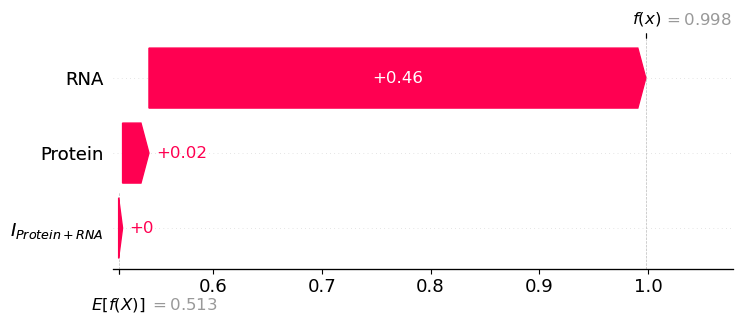

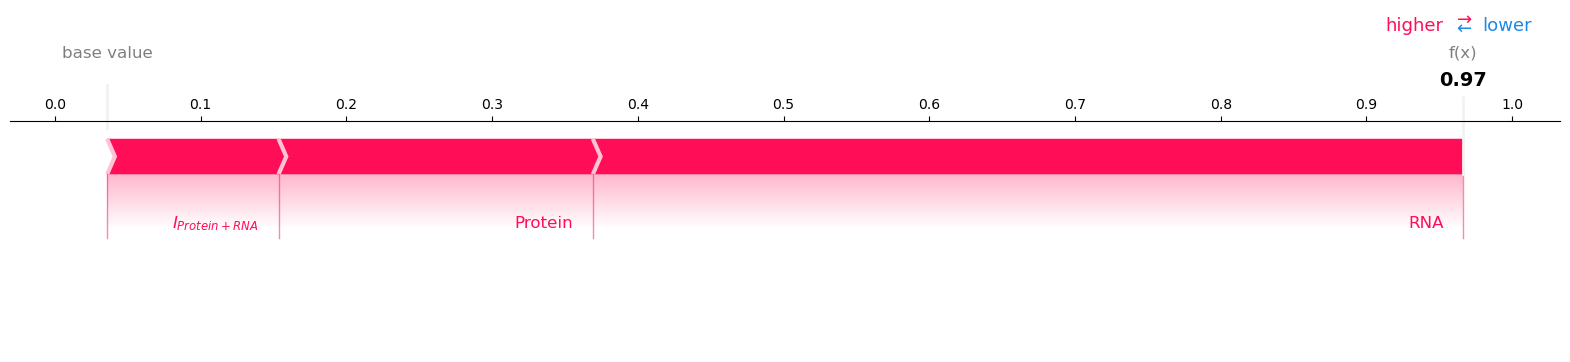

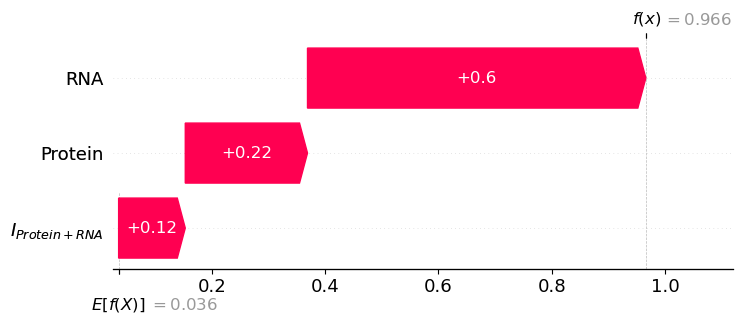

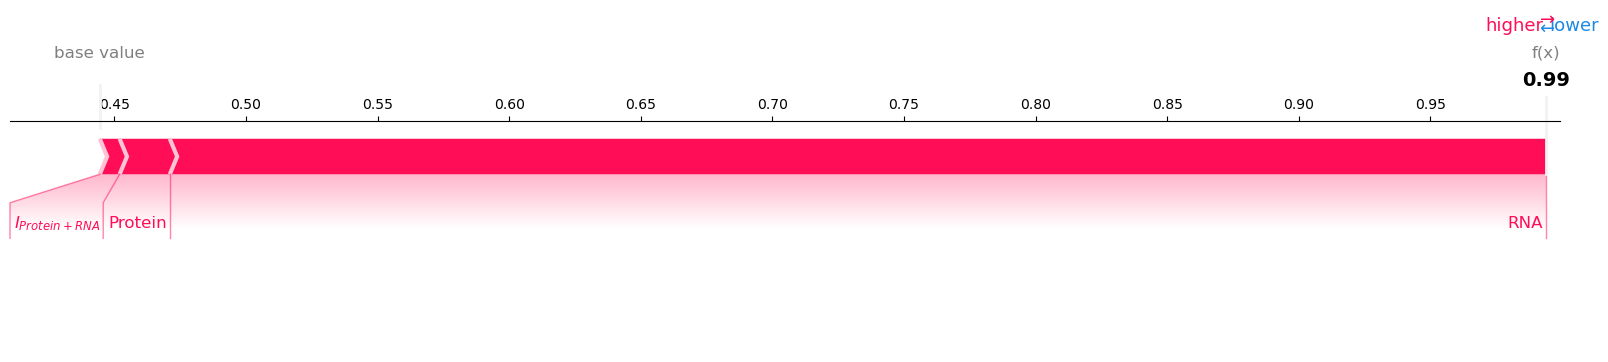

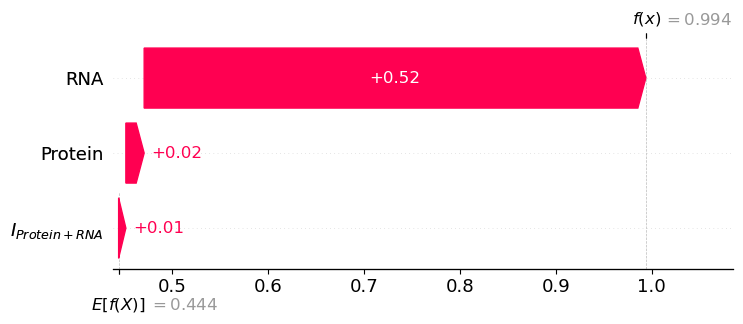

In [3]:
for i in range(n_classes):
    exp = results[f'Mean Class {i}']
    number = 0

    shap.force_plot(exp[number], show=False, matplotlib=True)
    plt.savefig(explaination_path/f'single_class_0_num_{number}_force_plot.pdf',bbox_inches='tight')
    plt.show()

    shap.plots.waterfall(exp[number],show=False)
    plt.savefig(explaination_path/f'single_class_0_num_{number}_waterfall_plot.pdf',bbox_inches='tight')
    plt.show()


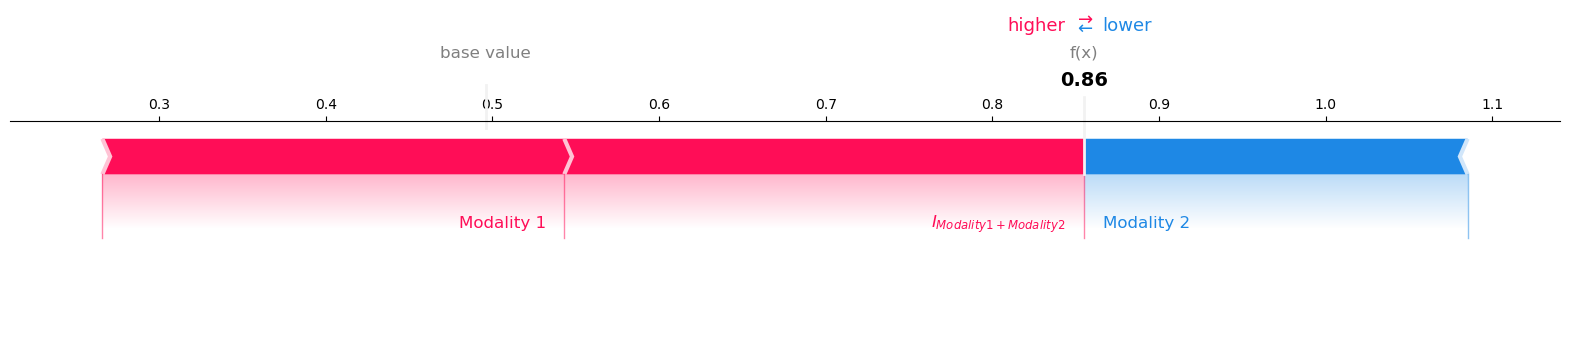

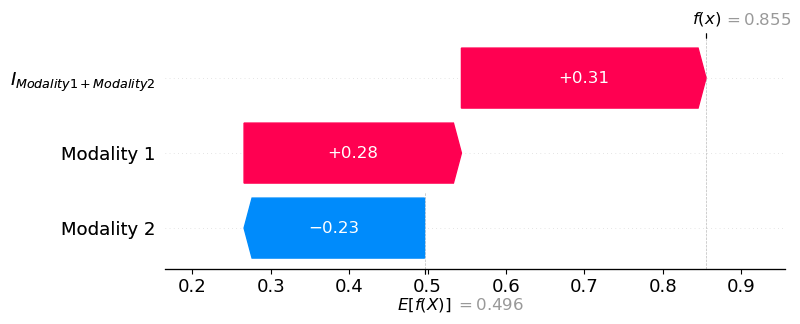

In [37]:

exp = results['Single Interaction Split']
number = 0

shap.force_plot(exp[number], show=False, matplotlib=True)
plt.savefig(explaination_path/f'single_interaction_split_num_{number}_force_plot.pdf',bbox_inches='tight')
plt.show()

shap.plots.waterfall(exp[number],show=False)
plt.savefig(explaination_path/f'single_interaction_split_num_{number}_waterfall_plot.pdf',bbox_inches='tight')
plt.show()